### About dataset
We’ll use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it’s less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 


This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.



The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


In [206]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [207]:
data=pd.read_csv('ChurnData.csv')

In [208]:
data.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
tenure      200 non-null float64
age         200 non-null float64
address     200 non-null float64
income      200 non-null float64
ed          200 non-null float64
employ      200 non-null float64
equip       200 non-null float64
callcard    200 non-null float64
wireless    200 non-null float64
longmon     200 non-null float64
tollmon     200 non-null float64
equipmon    200 non-null float64
cardmon     200 non-null float64
wiremon     200 non-null float64
longten     200 non-null float64
tollten     200 non-null float64
cardten     200 non-null float64
voice       200 non-null float64
pager       200 non-null float64
internet    200 non-null float64
callwait    200 non-null float64
confer      200 non-null float64
ebill       200 non-null float64
loglong     200 non-null float64
logtoll     200 non-null float64
lninc       200 non-null float64
custcat     200 non-null float64
chur

In [210]:
data.isnull().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

In [211]:
data['churn'] = data['churn'].astype('int')


In [212]:
data.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0


In [213]:
corr=data.corr()

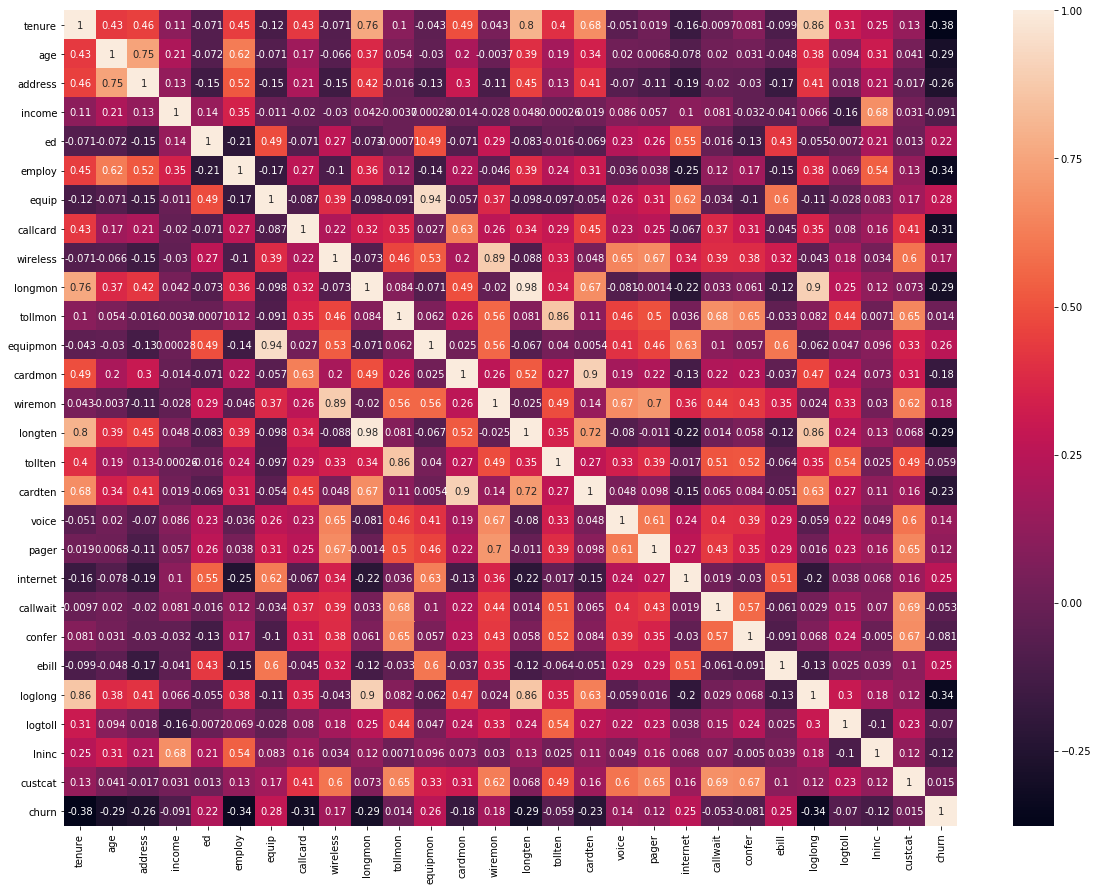

In [214]:
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)

In [215]:
corr['churn'].sort_values(ascending=False).iloc[1:].head(10)

equip       0.275284
equipmon    0.255348
ebill       0.254838
internet    0.254838
ed          0.216112
wiremon     0.177483
wireless    0.174356
voice       0.142315
pager       0.124623
custcat     0.014839
Name: churn, dtype: float64

In [216]:
churn_df = data[['equipmon', 'ed', 'wiremon', 'internet', 'ebill', 'equip','churn','wireless','voice','pager']]

In [217]:
churn_df.head()

,equipmon,ed,wiremon,internet,ebill,equip,churn,wireless,voice,pager
0,0.0,5.0,35.7,0.0,0.0,0.0,1,1.0,1.0,1.0
1,0.0,2.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,50.1,2.0,64.9,1.0,1.0,1.0,0,1.0,1.0,1.0
4,0.0,2.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0


In [218]:
co_corr=churn_df.corr()

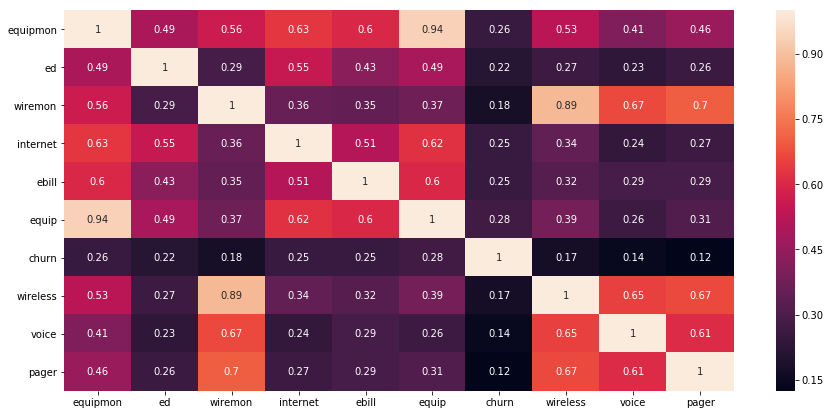

In [219]:
plt.figure(figsize=(15,7))
sns.heatmap(co_corr,annot=True)

In [220]:
X=churn_df.drop('churn',axis=1)
y=churn_df['churn']

In [221]:
from sklearn.cross_validation import train_test_split

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

In [223]:
from sklearn.linear_model import LogisticRegression

In [224]:
lgm=LogisticRegression(C=0.01,solver='saga',max_iter=999999999).fit(X_train,y_train)

In [225]:
lgm_pred=lgm.predict(X_test)

In [226]:
from sklearn.metrics import jaccard_similarity_score
print('Jaccard Similarity Score: ',round(jaccard_similarity_score(y_test, lgm_pred)*100,2),'%')

Jaccard Similarity Score:  78.79 %


In [227]:
acc=round(lgm.score(X_train, y_train) * 100, 2)
acc

67.91

In [228]:
from sklearn.metrics import classification_report,confusion_matrix

In [229]:
print (classification_report(y_test, lgm_pred))
print('\n')
print(confusion_matrix(y_test,lgm_pred))

             precision    recall  f1-score   support

          0       0.80      0.96      0.88        51
          1       0.60      0.20      0.30        15

avg / total       0.76      0.79      0.74        66



[[49  2]
 [12  3]]
